# Imports

In [1]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import math
from typing import List

# Traitement des données

In [2]:
users = pd.read_csv("datas/users.csv")
users_count = users.shape[0]
users_raw = users.copy()

caracteristics = pd.read_csv("datas/caracteristics_complete.csv", dtype={"admin1": str})

# Join the datasets on the Num_Acc key
# So we can retrieve the accident informations with the user
users = users.merge(caracteristics, on="Num_Acc")
users

,Num_Acc,place,catu,grav,sex,trip,secu,locp,actp,etatp,...,lat,long,dep,coordinates,datetime,lum_str,name,admin1,admin2,cc
0,201600000022,1.0,1,1,1,4.0,12.0,0.0,0.0,0.0,...,50.84579,2.26407,590,"(50.84579, 2.26407)",2016-04-02 01:45:00,Full day,Opperral,32,59,FR
1,201600000022,1.0,1,2,1,5.0,11.0,0.0,0.0,0.0,...,50.84579,2.26407,590,"(50.84579, 2.26407)",2016-04-02 01:45:00,Full day,Opperral,32,59,FR
2,201600000022,2.0,2,1,2,0.0,11.0,0.0,0.0,0.0,...,50.84579,2.26407,590,"(50.84579, 2.26407)",2016-04-02 01:45:00,Full day,Opperral,32,59,FR
3,201600000051,1.0,1,3,2,1.0,11.0,0.0,0.0,0.0,...,50.68000,2.79300,590,"(50.68, 2.793)",2016-04-29 01:45:00,Full day,Croix-du-Bac,32,59,FR
4,201600000051,1.0,1,1,1,1.0,11.0,0.0,0.0,0.0,...,50.68000,2.79300,590,"(50.68, 2.793)",2016-04-29 01:45:00,Full day,Croix-du-Bac,32,59,FR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545146,200500079672,3.0,2,1,2,0.0,31.0,0.0,0.0,0.0,...,48.20100,-1.70700,350,"(48.201, -1.707)",2005-12-27 01:30:00,Full day,Le Verger Beaucé,53.0,35,FR
545147,200500079672,4.0,2,3,1,0.0,11.0,0.0,0.0,0.0,...,48.20100,-1.70700,350,"(48.201, -1.707)",2005-12-27 01:30:00,Full day,Le Verger Beaucé,53.0,35,FR
545148,200500079672,2.0,2,4,2,0.0,10.0,0.0,0.0,0.0,...,48.20100,-1.70700,350,"(48.201, -1.707)",2005-12-27 01:30:00,Full day,Le Verger Beaucé,53.0,35,FR
545149,200500079672,5.0,2,4,2,0.0,11.0,0.0,0.0,0.0,...,48.20100,-1.70700,350,"(48.201, -1.707)",2005-12-27 01:30:00,Full day,Le Verger Beaucé,53.0,35,FR


In [3]:
# Convert the numerical values into a string, that is more convenient

users.loc[users.catu == 1, "catu"] = "Driver"
users.loc[users.catu == 2, "catu"] = "Passenger"
users.loc[users.catu == 3, "catu"] = "Pedestrian"
users.loc[users.catu == 4, "catu"] = "Pedestrian in rollerblade or scooter"

users.loc[users.sex == 1, "sex"] = "Male"
users.loc[users.sex == 2, "sex"] = "Female"

users.loc[users.grav == 1, "grav"] = "Unscathed"
users.loc[users.grav == 4, "grav"] = "Light injury"
users.loc[users.grav == 3, "grav"] = "Hospitalized wounded"
users.loc[users.grav == 2, "grav"] = "Killed"

users.loc[users.trip == 1, "trip"] = "Home - work"
users.loc[users.trip == 2, "trip"] = "Home - school"
users.loc[users.trip == 3, "trip"] = "Shopping - Shopping"
users.loc[users.trip == 4, "trip"] = "Professional use"
users.loc[users.trip == 5, "trip"] = "Promenade - leisure"
users.loc[users.trip == 9, "trip"] = "Other"
users.loc[users.trip == 0, "trip"] = "Unknown"

def secu(x):
    if x == "1":
        return "Belt"
    elif x == "2":
        return "Helmet"
    elif x == "3":
        return "Children's device"
    elif x == "4":
        return "Reflective equipment"
    else:
        return "Other"

users["has_belt"] = users.secu.apply(lambda x: True if str(x)[1] == "1" else False)
users["secu"] = users.secu.apply(lambda x: secu(str(x)[0]))

## Séléction des conducteurs uniquement

In [4]:
# Select only the drivers that made an accident
drivers = users[users.catu == "Driver"]
drivers_raw = users_raw[users_raw.catu == 1]
drivers_count = len(drivers)

# Définition des fonctions génératrices de graphiques

In [5]:
def bar(df: pd.DataFrame, x: str, labels: List[str]):
    """
    Create a bar chart for a specific column on a dataframe
    """
    return px.bar(
        x=x,
        y=df * 100,
        text=(df * 100).apply(lambda x: str(math.floor(x)) + "%"),
        range_y=[0, 100],
        labels=labels
    )

def pie(df: pd.DataFrame, column: str, title: str = None):
    """
    Create a pie chart for a specific column on a dataframe
    """
    data = df[column].value_counts() / len(df)
    
    fig = px.pie(
        data,
        title=column if title == None else title,
        values=data,
        names=data.index
    )

    fig.update_traces(textposition="inside", textinfo="percent+label")

    return fig.show()

# Catégorie d'utilisateur lors d'un accident

In [6]:
pie(users, "catu", "User categorie")

# Sexes concernés par un accident
Ce résultat peut paraître erroné dû à la grande inégalités d'accidents par sexe, mais cette statique est validé par le gouvernement français (https://www.securite-routiere.gouv.fr/actualites/la-problematique-de-laccidentologie-sous-langle-hommes-femmes-analysee-au-senat).
D'après plusieurs sources, cet écart viendrait du fait que les hommes aurais une attitude moins responsable au volant et prendraient beaucoup plus de risque que les femmes (conduite en état d'ivresse, accès de vitesse, conduite dangereuse, etc...)

**Sources**
- https://www.securite-routiere-az.fr/idees-recues/femme-au-volant-danger-au-tournant/
- https://fr.wikipedia.org/wiki/Accident_de_la_route_en_France
- https://www.interieur.gouv.fr/actualites/communiques/femmes-au-volant-vie-au-tournant
- https://www.securite-routiere.gouv.fr/actualites/la-problematique-de-laccidentologie-sous-langle-hommes-femmes-analysee-au-senat

In [7]:
pie(drivers, "sex", "Sex by accident")

# Gravité d'un accident
Dans la majorité des cas (39.4%), lorsqu'un accident se produit les personnes concernées s'en sorte indemnes. De façon presque égales (30.1%) les personnes subissent de légères séqueles physiques mais ne sont pas hospitalisées. Tout de même, plus d'un quart des personnes sont hospitalisées et un peu moins de 5% décèdent.

In [8]:
pie(users, "grav", "Gravity of accidents")

# L'utilisateur avait-il attaché sa ceinture ?
Malgrés toutes la sensibilisation sur les danger de la route et sur l'importance de la ceinture, on voit qu'encore un cinquième des personnes concernées par un accident n'avait pas attachée leur ceinture.

In [9]:
pie(users, "has_belt", "Had belt")

# Type de sécurité utilisées
On voit logiquement que les sécurités les plus utilisées sont bel et bien la ceinture et le casque (pour les véhicules deux roues de façon générale), une petite part est dédié à la sécurité mise en place pour les enfants (un siège pour enfant dans la plupart des cas). On peut aussi noter que les équipements reflectifs sont utilisés très peu utilisés, cela concerne plus particulièrement les vélos.

In [10]:
pie(users, "secu", "Security type")

# Conditions lumineuses
Le plupart des accidents se déroule en plein jour, cela est dû au fait que logiquement la population se déplace majoritairement durant la journées. Si l'on concidère les accident s'étant déroulés la nuit, on ne note qu'une très faible différence entre la proportions des accidents arrivée lorsqu'un éclairage etait présent et lorsqu'il n'y en avait pas (que 1.8%). On peut ne pas concidérer la catégorie "Night with public lighting not lit", cela concerne les accidents survenu la nuit quand les éclairage présent n'était pas allumé, ce sont des conditions très particulières, donc cet événements à très rarement lieu, d'où le faible pourcentage.

In [11]:
pie(users, "lum_str", "Lightning conditions")

# Corrélations
Il est intéressant de mesurer des corrélations entre plusieurs variables, comme ce sont toutes des variable qualitatives nominales on ne peut pas mesurer directement une corrélation avec la méthode `.corr()` de pandas, cela n'aurait pas de sens. Ce que l'on fait ici, c'est que l'on compte le nombre d'accidents survenus en fonction de deux variables puis l'on mesure la part qu'il représente sur le total d'accidents.

In [12]:
def corr(column1: str, column2: str):
    """
    Return the correlation between two nominal variables (column)
    """
    df_corr_grav_secu = pd.DataFrame(users[[column1, column2]].value_counts(), columns=["count"])
    sum = df_corr_grav_secu["count"].sum()
    df_corr_grav_secu["count"] = df_corr_grav_secu["count"] / sum
    df_corr_grav_secu.reset_index(inplace=True)
    df_corr_grav_secu = df_corr_grav_secu.pivot(index=column1, columns=column2, values="count")
    return df_corr_grav_secu

def heat_map(column1: str, column2: str):
    plt.figure(figsize=(16, 5))
    sns.heatmap(corr(column1, column2), annot=True, fmt=".2%")

### Exemple

In [13]:
corr("grav", "secu")

secu,Belt,Children's device,Helmet,Other,Reflective equipment
grav,,,,,
Hospitalized wounded,0.135623,0.001719,0.085606,0.039277,0.000954
Killed,0.025899,0.000275,0.010320,0.005791,0.000231
Light injury,0.172659,0.003225,0.079094,0.044224,0.001306
Unscathed,0.365218,0.003839,0.013572,0.010876,0.000292


# Corrélations de la gravité avec le type de sécurité
On voit que dans la plupart des cas, une personne s'en sortant indemne avait mis le ceinture. On remarque aussi que dans la colonne "Belt" la gravité de l'accident est dégressive. On peut continuer à traiter de ce grave en isolant les colonnes, on voit que les équipements pour enfants ainsi que les équipements reflectifs n'ont pas un grand impacte sur la gravité d'un accident. Pour le port du casque on remarque que dans la plupart des des cas la personne est hospitalisée ou s'en sort avec de légère blessures, cela est dû au fait que le corps entier d'un cycliste est vulnérable lors d'un accident, pas uniquement la tête. De plus un cycliste est très rarement le seul résponsable de son accidents, en général on parle de collision avec un véhicule tiers, ce qui explique alors l'hospitalisation dans la plupart des accidents.

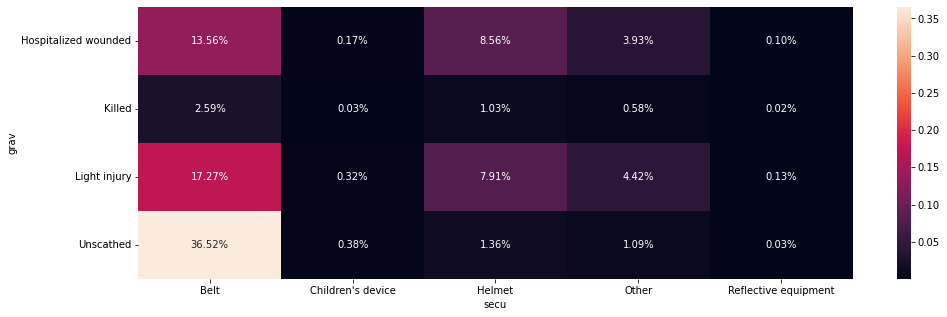

In [14]:
heat_map("grav", "secu")

# Corrélations de la gravité avec le fait d'avoir mis la ceinture
On voit que dans la colonne de droite (représentant les personnes ayant porté une ceinture) la plupart des gens s'en sorte indemnes, et avec une grande différence de pourcentage vient ensuite les légères blessures puis l'hospitalisation puis la mort, ceci est dans l'ordre logique des choses. Maintenant en regardant la colonne du non port de la ceinture, cela est bien différent, les légères blessures arrivent le plus fréquement, vient ensuite l'hospitalisation puis les personnes indemnes et ensuite la mort. Il est alors clair que la ceinture est la protection la plus importante afin de limiter les conséquence d'un accidents, et cela sauve énormément de vies.

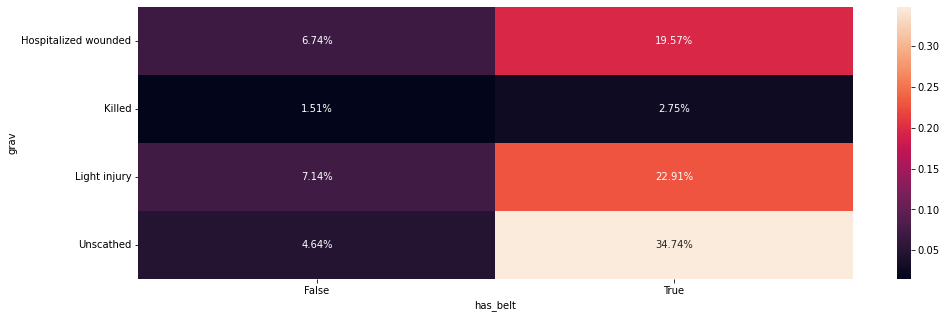

In [15]:
heat_map("grav", "has_belt")

# Corrélations de la gravité avec le type de voyage
Les petits accidents se déroule en général lors d'une petite promenade en voiture, ensuite viennent les accidents s'étant déroulés lors d'un déplacement professionnel suivi de près par les déplacements maison-travail. Les accidents influgeant des petites blessures arrivent le plus souvent également lors d'une petite promenade en voiture, tout comme pour les accidents demandant une hospitalisation. La deuxième catégorie (en ne prenant pas en compte unknown) de voyage où les accidents surviennent le plus sont les déplacements maison-travail.

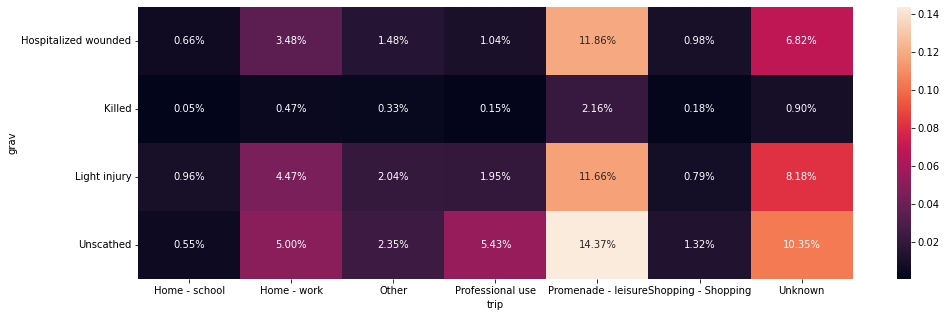

In [16]:
heat_map("grav", "trip")

# Corrélations de la gravité avec le type de sexe
En haut de ce notebook on a pu remarquer que les femmes font effectivement moins d'accidents que les hommes, ici l'on peut voir de façon plus précise la gravité de ces accidents en question. Les hommes font plus de légers accidents où ils s'en sortent indemnes (28%) que les femmes, avec une grande différence entre le nombre d'accidents infligeant de légères blessures (18%) puis vient presque aussi fréquement les accidents nécessitant une hospitalisation. Pour les femmes, on a deux catégories qui surviennent presque aussi souvent, elle s'en sorte indemnes ou légèrement blessées dans la majorités de cas, puis elles sont hospitalisés bien moins souvent que les hommes. Même si la mortalité au volant reste supérieure chez les hommes, on voit que l'écart est moins creusé entre hommes et femmes.

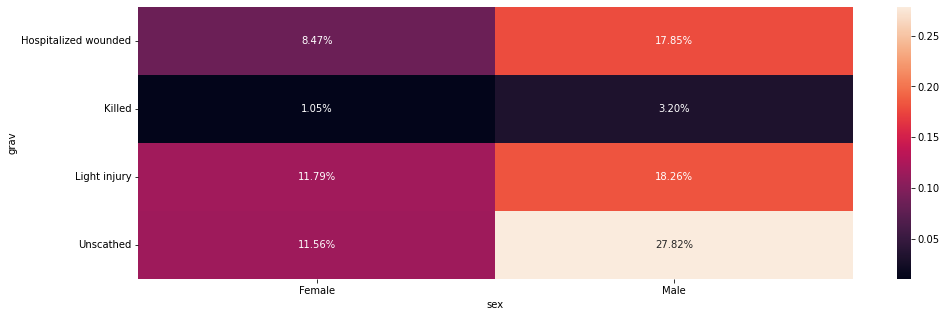

In [17]:
heat_map("grav", "sex")

# Corrélations de la gravité avec le type de luminosité
Logiquement la colonne réprensentant le nombre d'accidents survenus en pleins jours est celle qui contient la mojorité des accidents, et le nombre d'accident en fonction de la gravité va dans le sens logique, il est plus intéressant de s'attarder sur les accidents survenu la nuit. On voit que la nuit, qu'il y'ai des éclairage public ou non, l'écart est très faible entre les personnes s'en sortant indemnes et celles qui subissent de légères blessures. Si on regarde la colonne des accidents survenu la nuit sans éclairages public, dans la plupart des cas les personnes sont hospitalisés, il en ressort alors que les éclairages publiques sont effectivement un très bon moyen de réduire la mortalité au volant. Cette catégorie contient également le plus de mortalités après la catégorie des accidents survenus en pleine journée.

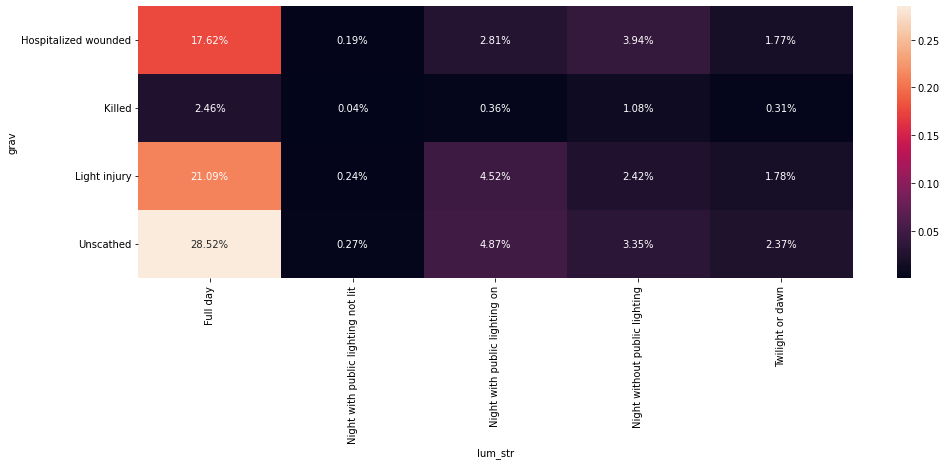

In [18]:
heat_map("grav", "lum_str")